<a href="https://colab.research.google.com/github/Davichobacter/ds-4geeks/blob/main/Taller_26_06_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#sesión extra - ordinaria
# poder - de mercado

In [ ]:
import pandas as pd
from scipy.stats import shapiro

In [ ]:
url = "https://raw.githubusercontent.com/it-ces/Datasets/refs/heads/main/MarketPower.csv"

In [ ]:
df = pd.read_csv(url)

$$ q = \frac{\theta - cm }{2 \beta}$$

In [ ]:
df['q'] = (df['theta'] - df['cm'])/(2*df['beta'])

In [ ]:
df['Q'] =df.groupby(by=['sector'])['q'].transform("sum")

In [ ]:
df['share'] = (df['q']/df['Q'])*100

In [ ]:
shapiro(df['cm']).pvalue
# p-value
# H0: X sim N
# Ha: X not sim N

np.float64(0.0002559126998811705)

In [ ]:
df['theta']

,theta
0,125.121419
1,125.645324
2,126.766324
3,127.141536
4,127.472341
...,...
122,1237.516764
123,1236.938396
124,1235.802773
125,1237.271186


In [ ]:
df['cm'].mean()

np.float64(6.9511329568324065)

In [ ]:
df['cm'].std()

1.8474482395966891

In [ ]:
df['cm'].quantile(0.5)

np.float64(6.838649584760122)

In [ ]:
# IQR
df['cm'].quantile(0.75) - df['cm'].quantile(0.25)

np.float64(2.6772932058306544)

In [ ]:
def descriptive(SERIE):
  if shapiro(SERIE).pvalue < 0.05:
    print('p50 - IQR')
    return SERIE.quantile(0.5), SERIE.quantile(0.75) - SERIE.quantile(0.25)
  else:
    print(" Mean - Std")
    return SERIE.mean(), SERIE.std()

In [ ]:
df[df['sector'] == 'Financial']

,Unnamed: 0,theta,beta,cm,sector,q,Q,share
122,0,1237.516764,24.4,4.306088,Financial,25.270711,175.602295,14.390877
123,1,1236.938396,11.4,5.101223,Financial,54.027946,175.602295,30.767221
124,2,1235.802773,12.4,4.073056,Financial,49.666521,175.602295,28.283526
125,3,1237.271186,23.4,3.709515,Financial,26.358155,175.602295,15.010143
126,4,1238.975302,30.4,6.014435,Financial,20.278962,175.602295,11.548233


In [ ]:
for valor in df['sector'].unique():
  for var in ['cm', 'q']:
    print(valor, var)
    print(descriptive(df[df['sector']==valor][var]))

Software cm
 Mean - Std
(np.float64(10.030047365822861), 1.1849260557929286)
Software q
p50 - IQR
(np.float64(2.7018747487014245), np.float64(3.2695156410170734))
Diapers cm
 Mean - Std
(np.float64(4.322634576267456), 0.1604878254223138)
Diapers q
 Mean - Std
(np.float64(302.5729722119885), 208.50462777670035)
Agriculture cm
p50 - IQR
(np.float64(6.5572289621841815), np.float64(2.2905057165746223))
Agriculture q
p50 - IQR
(np.float64(22.222841232788717), np.float64(19.447179552746398))
Financial cm
 Mean - Std
(np.float64(4.640863552259011), 0.9220248782705273)
Financial q
 Mean - Std
(np.float64(35.12045891583861), 15.517301156115423)


/tmp/ipython-input-291-88324917.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  if shapiro(SERIE).pvalue < 0.05:


In [ ]:
test = pd.DataFrame({'pancitos':[2,2, 3,3,5],
        'felicidad':[2,1,4,4,5]})

In [ ]:
test.groupby(by=['pancitos'])['felicidad'].max()

,felicidad
pancitos,
2,2
3,4
5,5


In [ ]:
test.groupby(by=['pancitos'])['felicidad'].min()

,felicidad
pancitos,
2,1
3,4
5,5


In [ ]:
import numpy as np

In [ ]:
test.groupby(by=['pancitos'])['felicidad'].agg(['mean', 'std', 'min', 'max',])

,mean,std,min,max
pancitos,,,,
2,1.5,0.707107,1,2
3,4.0,0.000000,4,4
5,5.0,NaN,5,5


In [ ]:
# coeficiente de variación?

$$ cv  = \frac{s}{\bar{x}} $$
si cv > 0.3 vamos a decir que es heterogeneo, else:
es homogeneo. solo tiene sentido para las variables que son ratio, no tiene sentido para las variables de intervalo.........!

In [ ]:
test['felicidad'].std() / test['felicidad'].mean()

np.float64(0.5134898976610932)

In [ ]:
def cv(SERIE):
  return SERIE.std() / SERIE.mean()

In [ ]:
cv(test['felicidad'])

np.float64(0.5134898976610932)

In [ ]:
test.groupby(by=['pancitos'])['felicidad'].agg(['mean', 'std', cv])

,mean,std,cv
pancitos,,,
2,1.5,0.707107,0.471405
3,4.0,0.000000,0.000000
5,5.0,NaN,NaN


In [ ]:
df.groupby(by=['sector'])['cm'].agg(['mean', 'std',cv])

,mean,std,cv
sector,,,
Agriculture,6.503434,1.230096,0.189146
Diapers,4.322635,0.160488,0.037127
Financial,4.640864,0.922025,0.198675
Software,10.030047,1.184926,0.118138


In [ ]:
def descriptive(SERIE):
  if shapiro(SERIE).pvalue < 0.05:
    return 'median ' + str( round(SERIE.quantile(0.5), 3))  + ' - ' + ' IQR ' + str(round(SERIE.quantile(0.75) - SERIE.quantile(0.25),3))
  else:
    return 'mean ' + str(round(SERIE.mean(),2))  + ' - ' + 'SD ' + str(round(SERIE.std(),2))

In [ ]:
df.groupby(by=['sector'])['cm'].agg([descriptive])

/tmp/ipython-input-305-2030609783.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  if shapiro(SERIE).pvalue < 0.05:


,descriptive
sector,
Agriculture,median 6.557 - IQR 2.291
Diapers,mean 4.32 - SD 0.16
Financial,mean 4.64 - SD 0.92
Software,mean 10.03 - SD 1.18


In [ ]:
def scale(SERIE):
  return (SERIE - SERIE.mean())/(SERIE.std())

In [ ]:
df.groupby(by=['sector'])['q'].transform(scale)

,q
0,-0.635910
1,-0.626759
2,-0.383612
3,-0.506726
4,-0.594930
...,...
122,-0.634759
123,1.218478
124,0.937409
125,-0.564680


In [ ]:
## A manooooo estandarizar

In [ ]:
import seaborn as sns

<Axes: xlabel='sector', ylabel='cm'>

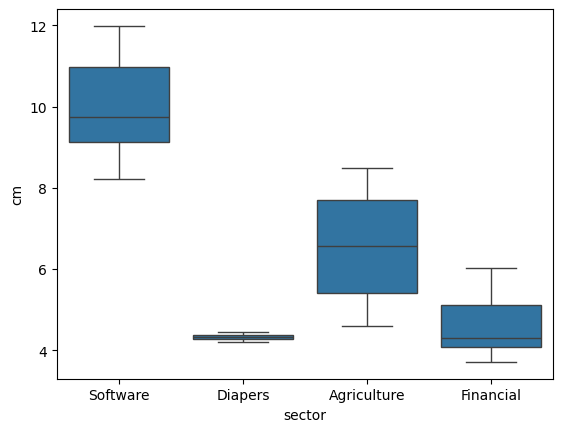

In [ ]:
sns.boxplot(data = df, x = 'sector', y = 'cm')

<Axes: xlabel='sector', ylabel='q'>

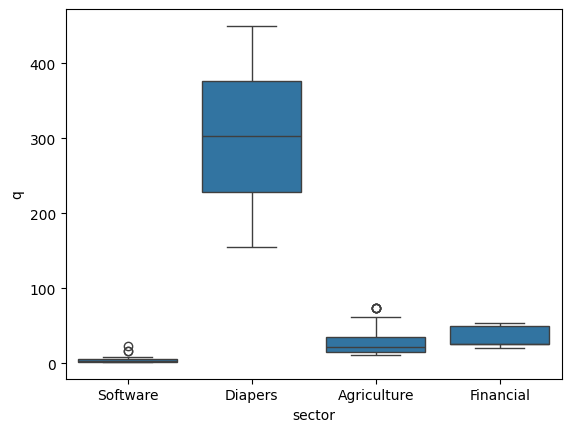

In [ ]:
sns.boxplot(data = df, x = 'sector', y = 'q')

In [ ]:
# think strategically
df

,Unnamed: 0,theta,beta,cm,sector,q,Q,share
0,0,125.121419,31.5,9.799712,Software,1.830503,113.335900,1.615113
1,1,125.645324,30.5,10.616998,Software,1.885710,113.335900,1.663824
2,2,126.766324,17.5,9.426922,Software,3.352554,113.335900,2.958069
3,3,127.141536,22.5,9.698818,Software,2.609838,113.335900,2.302746
4,4,127.472341,28.5,9.042124,Software,2.077723,113.335900,1.833244
...,...,...,...,...,...,...,...,...
122,0,1237.516764,24.4,4.306088,Financial,25.270711,175.602295,14.390877
123,1,1236.938396,11.4,5.101223,Financial,54.027946,175.602295,30.767221
124,2,1235.802773,12.4,4.073056,Financial,49.666521,175.602295,28.283526
125,3,1237.271186,23.4,3.709515,Financial,26.358155,175.602295,15.010143


In [ ]:
new = {}
new

{}

In [ ]:
new['key1'] = 'judit'
new['key2'] = 'mónica'
new['key3'] = 'laura'

In [ ]:
market = {}
market['apple'] = [10, 4]
market['orange'] = [200, 3]
market['kumis'] = [10, 15]

In [ ]:
market['kumis']

[10, 15]

In [ ]:
book = {}
for i in range(1,10):
  book[i] = i**3

In [ ]:
names = ['laura', 'karen', 'myrsha', 'fer']
mascotas = ['pez', 'perro', 'gato', 'loro']

In [ ]:
mascotas_book = {}
for i in range(len(names)):
  mascotas_book[names[i]]  = mascotas[i]

In [ ]:
mascotas_book['myrsha']

'gato'

In [ ]:
mascotas_book

{'laura': 'pez', 'karen': 'perro', 'myrsha': 'gato', 'fer': 'loro'}

In [ ]:
letters = ['a','b', 'c', 'd', 'e', 'f','g']
info = {}
for letter in letters:
  info[letter] = [letter.upper(), ord(letter)]

In [ ]:
info['g']

['G', 103]

In [ ]:
info_sector = {}
for sector in df['sector'].unique():
  info_sector[sector] = [df[df['sector']==sector]['q'].mean(),
                         df[df['sector']==sector]['q'].std()]

In [ ]:
info_sector

{'Software': [np.float64(5.666795018168895), 6.032761025990039],
 'Diapers': [np.float64(302.5729722119885), 208.50462777670035],
 'Agriculture': [np.float64(28.450230850645458), 16.968497111162513],
 'Financial': [np.float64(35.12045891583861), 15.517301156115423]}

In [ ]:
test  = {'var1': [19,41, 31],
         'var2': [False, True, 'Rojo']}
test = pd.DataFrame(test)

In [ ]:
test

,var1,var2
0,19,False
1,41,True
2,31,Rojo


In [ ]:
for index in test.index:
  print(test.loc[index, 'var2'])

False
True
Rojo


In [ ]:
info_sector

{'Software': [np.float64(5.666795018168895), 6.032761025990039],
 'Diapers': [np.float64(302.5729722119885), 208.50462777670035],
 'Agriculture': [np.float64(28.450230850645458), 16.968497111162513],
 'Financial': [np.float64(35.12045891583861), 15.517301156115423]}

In [ ]:
df['q-std'] = 0

In [ ]:
for index in df.index:
  sector = df.loc[index, 'sector']
  media = info_sector[sector][0]
  sd = info_sector[sector][1]
  df.loc[index, 'q-std'] = (df.loc[index, 'q'] - media)/sd

/tmp/ipython-input-332-2966336979.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.635909780867833' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'q-std'] = (df.loc[index, 'q'] - media)/sd


In [ ]:
df

,Unnamed: 0,theta,beta,cm,sector,q,Q,share,q-std
0,0,125.121419,31.5,9.799712,Software,1.830503,113.335900,1.615113,-0.635910
1,1,125.645324,30.5,10.616998,Software,1.885710,113.335900,1.663824,-0.626759
2,2,126.766324,17.5,9.426922,Software,3.352554,113.335900,2.958069,-0.383612
3,3,127.141536,22.5,9.698818,Software,2.609838,113.335900,2.302746,-0.506726
4,4,127.472341,28.5,9.042124,Software,2.077723,113.335900,1.833244,-0.594930
...,...,...,...,...,...,...,...,...,...
122,0,1237.516764,24.4,4.306088,Financial,25.270711,175.602295,14.390877,-0.634759
123,1,1236.938396,11.4,5.101223,Financial,54.027946,175.602295,30.767221,1.218478
124,2,1235.802773,12.4,4.073056,Financial,49.666521,175.602295,28.283526,0.937409
125,3,1237.271186,23.4,3.709515,Financial,26.358155,175.602295,15.010143,-0.564680


<Axes: xlabel='sector', ylabel='q-std'>

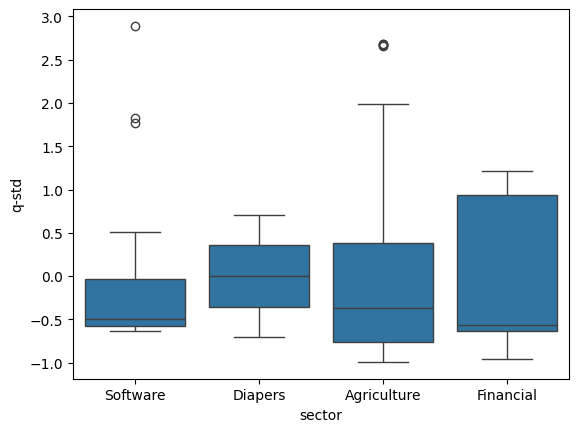

In [ ]:
sns.boxplot(data= df, x='sector', y = 'q-std')

In [ ]:
def scale(SERIE):
  return (SERIE - SERIE.mean()) / SERIE.std()

In [ ]:
df['q-scaled'] = df.groupby(by=['sector'])['q'].transform(scale)

In [ ]:
df

,Unnamed: 0,theta,beta,cm,sector,q,Q,share,q-std,q-scaled
0,0,125.121419,31.5,9.799712,Software,1.830503,113.335900,1.615113,-0.635910,-0.635910
1,1,125.645324,30.5,10.616998,Software,1.885710,113.335900,1.663824,-0.626759,-0.626759
2,2,126.766324,17.5,9.426922,Software,3.352554,113.335900,2.958069,-0.383612,-0.383612
3,3,127.141536,22.5,9.698818,Software,2.609838,113.335900,2.302746,-0.506726,-0.506726
4,4,127.472341,28.5,9.042124,Software,2.077723,113.335900,1.833244,-0.594930,-0.594930
...,...,...,...,...,...,...,...,...,...,...
122,0,1237.516764,24.4,4.306088,Financial,25.270711,175.602295,14.390877,-0.634759,-0.634759
123,1,1236.938396,11.4,5.101223,Financial,54.027946,175.602295,30.767221,1.218478,1.218478
124,2,1235.802773,12.4,4.073056,Financial,49.666521,175.602295,28.283526,0.937409,0.937409
125,3,1237.271186,23.4,3.709515,Financial,26.358155,175.602295,15.010143,-0.564680,-0.564680
